In [1]:
import pandas as pd
import numpy as np

In [ ]:
Empleados=pd.read_csv("https://raw.githubusercontent.com/AlcidesOxa/datos/master/ejemplo.csv",sep=';',encoding="ISO-8859-1")
Empleados.head()

In [3]:
cambio={'Años estudio':'Anios_estudio', 'Estado Civil':'Estado_civil', 'Satisfacción Trabajo':'Satisfaccion_trabajo', 'Fecha contrato':'Fecha_contrato'}
Empleados.rename(columns=cambio,inplace=True)
casosborrar=[3,5,8]
Empleados=Empleados.drop(casosborrar)
varborrar=['Faltas','Permisos']
Empleados=Empleados.drop(varborrar,axis=1)
varcategoricas=['Sexo','Estado_civil','Satisfaccion_trabajo']
Empleados[varcategoricas]=Empleados[varcategoricas].fillna('Desconocido')
Empleados[varcategoricas]=Empleados[varcategoricas].astype('category')
Empleados['Fecha_contrato']=pd.to_datetime(Empleados.Fecha_contrato)
orden_ec=Empleados.Estado_civil.cat.categories.values[[3,0,2,4,1]].tolist()
orden_st=Empleados.Satisfaccion_trabajo.cat.categories.values[[2,3,0,1]].tolist()
Empleados.Estado_civil=Empleados.Estado_civil.cat.reorder_categories(orden_ec)
Empleados.Satisfaccion_trabajo=Empleados.Satisfaccion_trabajo.cat.reorder_categories(orden_st)
Empleados['Satisfaccion_trabajo']=Empleados.Satisfaccion_trabajo.cat.rename_categories(
    ['Insatisfecho(a)','Neutral','Satisfecho(a)','Desconocido'])
Empleados['Experiencia_lab']=Empleados.Edad-Empleados.Anios_estudio-5
Empleados['Balance']=Empleados.Ingresos-Empleados.Gastos

# Frecuencias y proporciones

**Frecuencia absoluta**

Es la cantidad de veces que se repite un valor de una variable categórica
\begin{eqnarray*}
n_{i}=\#\left\{ X:X=X_{i}\right\}
\end{eqnarray*}
donde $X$ es la variable categórica y $X_{i}$ es un valor particular de la variable. La suma de las frecuencias absolutas es $n=n_{1}+n_{2}+\ldots +n_{k}=\sum_{i=1}^{k}n_{i}$, donde $k$ es el número de valores únicos de la variable categórica.

In [ ]:
# Obtiene las frecuencias absolutas de cada valor de la variable Estado Civil (k=5)
Empleados.Estado_civil.value_counts()

Casado(a)        13
Divorciado(a)     5
Soltero(a)        4
Viudo(a)          3
Desconocido       2
Name: Estado_civil, dtype: int64

**Frecuencia relativa (proporción)**

La frecuencia absoluta sobre el total $n$ se denomina frecuencia relativa, e indica qué proporción del total representa el valor de la variable en el conjunto de datos
\begin{eqnarray*}
p_{i}=\frac{n_{i}}{n}
\end{eqnarray*}
y se tiene que $\sum_{i=1}^{k}p_{i}=1$.

In [ ]:
#Frecuencias relativas o proporciones de cada valor de Estado civil
Empleados.Estado_civil.value_counts(normalize=True)

Casado(a)        0.481481
Divorciado(a)    0.185185
Soltero(a)       0.148148
Viudo(a)         0.111111
Desconocido      0.074074
Name: Estado_civil, dtype: float64

# Tablas de doble entrada

**Frecuencia absoluta conjunta**

Es la cantidad de veces que se repite un conjunto de valores, cada uno de una variable categórica distinta. Para el caso bidimensional la frecuencia conjunta es
\begin{eqnarray*}
n_{ij}=\#\left\{ \left( X,Y\right):X=X_{i} \wedge Y=Y_{i}\right\}
\end{eqnarray*}
donde $X$ y $Y$ son variables categóricas, $X_{i}$ y $Y_{i}$ son valores particulares de $X$ y $Y$ respectivamente. La suma de las frecuencias absolutas es $n=\sum_{i=1}^{k}\sum_{j=1}^{h}n_{ij}$, donde $k$ es el número de valores únicos de $X$ y $h$ es lo mismo de $Y$. Asimismo, se pueden definir las frecuencias marginales como $n_{i.}=\sum_{j=1}^{h}n_{ij}$ por filas, y $n_{.j}=\sum_{i=1}^{k}n_{ij}$ por columnas.

In [ ]:
pd.crosstab(Empleados.Sexo,Empleados.Estado_civil)

Estado_civil,Soltero(a),Casado(a),Divorciado(a),Viudo(a),Desconocido
Sexo,,,,,
Hombre,1,6,4,3,2
Mujer,3,7,1,0,0


In [ ]:
pd.crosstab(Empleados.Sexo,Empleados.Estado_civil,margins=True,margins_name='Total')

Estado_civil,Soltero(a),Casado(a),Divorciado(a),Viudo(a),Desconocido,Total
Sexo,,,,,,
Hombre,1,6,4,3,2,16
Mujer,3,7,1,0,0,11
Total,4,13,5,3,2,27


**Frecuencia relativa conjunta**

Son las proporciones con respecto al total de datos que representan las frecuencias conjuntas. Para el caso bidimensional es
\begin{eqnarray*}
p_{ij}=\frac{n_{ij}}{n}
\end{eqnarray*}
y se tiene que $\sum_{i=1}^{k}\sum_{j=1}^{h}p_{ij}=1$. Asimismo, se pueden definir las frecuencias relativas marginales como $p_{i.}=\sum_{j=1}^{h}p_{ij}$ por filas, y $p_{.j}=\sum_{i=1}^{k}p_{ij}$ por columnas.

In [ ]:
pd.crosstab(Empleados.Sexo,Empleados.Estado_civil,
            margins=True,margins_name='Total',normalize='all')

Estado_civil,Soltero(a),Casado(a),Divorciado(a),Viudo(a),Desconocido,Total
Sexo,,,,,,
Hombre,0.037037,0.222222,0.148148,0.111111,0.074074,0.592593
Mujer,0.111111,0.259259,0.037037,0.000000,0.000000,0.407407
Total,0.148148,0.481481,0.185185,0.111111,0.074074,1.000000


Las frecuencias de $X$ (la variable en filas) condicionadas a que $Y$ (la variable en columnas) tome valores particulares es
\begin{eqnarray*}
p_{i\mid j}=\frac{p_{ij}}{p_{.j}}=\frac{n_{ij}}{n_{.j}}
\end{eqnarray*}
se puede demostrar que $\sum_{i=1}^{k}p_{i \mid j}=1$.

In [ ]:
pd.crosstab(Empleados.Sexo,Empleados.Estado_civil,margins=True,
            margins_name='Total',normalize='columns')

Estado_civil,Soltero(a),Casado(a),Divorciado(a),Viudo(a),Desconocido,Total
Sexo,,,,,,
Hombre,0.25,0.461538,0.8,1.0,1.0,0.592593
Mujer,0.75,0.538462,0.2,0.0,0.0,0.407407


Las frecuencias de $Y$ (la variable en columnas) condicionadas a que $X$ (la variable en filas) tome valores particulares es
\begin{eqnarray*}
p_{j\mid i}=\frac{p_{ij}}{p_{i.}}=\frac{n_{ij}}{n_{i.}}
\end{eqnarray*}
se puede demostrar que $\sum_{j=1}^{h}p_{j \mid i}=1$.

In [ ]:
pd.crosstab(Empleados.Sexo,Empleados.Estado_civil,
            margins=True,margins_name='Total',normalize='index')

Estado_civil,Soltero(a),Casado(a),Divorciado(a),Viudo(a),Desconocido
Sexo,,,,,
Hombre,0.062500,0.375000,0.250000,0.187500,0.125000
Mujer,0.272727,0.636364,0.090909,0.000000,0.000000
Total,0.148148,0.481481,0.185185,0.111111,0.074074


# Estadísticos descriptivos

**Media aritmética**

La media aritmética es una medida de tendencia central, que resume en un valor los valores que toma una variables cuantitativa con el fin de ser representativo del conjunto de datos.
Sea $X_{1},$ $X_{2},$ $\ldots ,$ $X_{n}$ una muestra de datos, la media aritmética se calcula como:
\begin{eqnarray*}
\overline{X} &=&\frac{\sum_{i=1}^{n}X_{i}}{n}
\end{eqnarray*}

In [ ]:
Empleados.mean()

Edad                 42.461538
Anios_estudio        14.320000
Ingresos           7541.576923
Gastos             6409.807692
Experiencia_lab      23.166667
Balance            1131.769231
dtype: float64

In [ ]:
np.mean(Empleados.Edad)

42.46153846153846

**Cuantiles**

Un cuantil es una medida de posición, que indica el valor que toma una variable tal que se halla sobre una proporción $\alpha$ de los datos. Un método de obtener un cuantil de una distribución empírica es debido a Mood \& Graybill (1963). Primero se ordenan los datos $X_{i}$  en forma ascendente, luego se calcula $m=\left( n+1\right) \alpha $ donde $n$ es el tamaño de la muestra y $\alpha $ es la proporción de valores menores al cuantil deseado. La estimación del cuantil es
\begin{eqnarray*}
\widehat{Q}_{\alpha } &=&X_{p}+r\left( X_{p+1}-X_{p}\right)
\end{eqnarray*}
donde $p$ es la parte entera de $m$, $0\leq p\leq n$, y $r$ es la parte fraccional de $m$. Por conveniencia $X_{0}=X_{1}$ y $X_{n+1}=X_{n}$.


In [ ]:
Empleados.quantile(.35)
Empleados.quantile([.45,.57,.84])

,Edad,Anios_estudio,Ingresos,Gastos,Experiencia_lab,Balance
0.45,39.25,14.0,6871.50,5661.25,22.00,755.25
0.57,41.50,17.0,7822.75,7119.50,25.22,1527.75
0.84,55.00,20.0,11467.00,9344.00,35.64,2925.00


Los cuantiles pueden ser:


*   La mediana: $Me$. Se tiene que $Me=Q_{0.5}$
*   Los cuartiles: $C_1$, $C_2$ y $C_3$. Se tiene que $C_j=Q_{ \frac{j}{4}}$
*   Los deciles: $D_1$, $D_2$, $...$, y $D_{10}$. Se tiene que $D_j=Q_{ \frac{j}{10}}$
*   Los percentiles: $P_1$, $P_2$, $...$, y $P_{100}$. Se tiene que $P_j=Q_{ \frac{j}{100}}$
*   $\min=Q_0$ y $\max=Q_1$


In [ ]:
Empleados.median()
Empleados.min(numeric_only=True)
Empleados.min()
Empleados.max(numeric_only=True)
Empleados.max()

Edad                  67.0
Anios_estudio         23.0
Ingresos           15479.0
Gastos             11021.0
Experiencia_lab       45.0
Balance             6135.0
dtype: float64

In [ ]:
# Cuartil 3
Empleados.quantile(.75)

Edad                  51.75
Anios_estudio         19.00
Ingresos           10924.25
Gastos              8071.00
Experiencia_lab       30.00
Balance             2676.00
Name: 0.75, dtype: float64

In [ ]:
#Decil 7
Empleados.quantile(.7)

Edad                  49.0
Anios_estudio         17.8
Ingresos           10805.5
Gastos              7900.0
Experiencia_lab       29.1
Balance             2568.5
Name: 0.7, dtype: float64

In [ ]:
#Percentil 84
Empleados.quantile(.84)

Edad                  55.00
Anios_estudio         20.00
Ingresos           11467.00
Gastos              9344.00
Experiencia_lab       35.64
Balance             2925.00
Name: 0.84, dtype: float64

**Sumas y productos**

In [ ]:
Empleados.sum()
Empleados.sum(numeric_only=True)
Empleados.prod()

Edad               9.554719e+41
Anios_estudio      5.845885e+27
Ingresos           1.398035e+99
Gastos             8.345084e+97
Experiencia_lab    1.145077e+31
Balance           -7.320238e+80
dtype: float64

**Varianza**

La varianza es una medida de dispersión, que indica el grado de variabilidad que tiene una variable. La varianza de una variable $X$ es
\begin{eqnarray*}
S^{2} &=&\frac{\sum_{i=1}^{n}\left( X_{i}-\overline{X}\right) ^{2}}{n-1}
\end{eqnarray*}
donde $\overline{X}$ es la media de la variable. La división entre $n$ se puede hacer para fines descriptivos, y entre $n-1$ es para fines inferenciales. A mayores valores que tome la varianza, mayor será la dispersión y más heterogeneidad tendrán los datos.

In [ ]:
Empleados.var()

Edad               1.155385e+02
Anios_estudio      3.372667e+01
Ingresos           1.485960e+07
Gastos             6.137442e+06
Experiencia_lab    1.481449e+02
Balance            4.205604e+06
dtype: float64

In [ ]:
np.var(Empleados.Anios_estudio)

32.377599999999994

**Desviación estándar**

La desviación estándar es una medida de dispersión que se puede interpretar en las unidades de la variable, a diferencia de la varianza que se halla en unidades al cuadrado
\begin{eqnarray*}
S &=&\sqrt{S^{2}}
\end{eqnarray*}

In [ ]:
Empleados.std()

Edad                 10.748882
Anios_estudio         5.807466
Ingresos           3854.815058
Gastos             2477.386171
Experiencia_lab      12.171480
Balance            2050.756900
dtype: float64

In [ ]:
np.std(Empleados.Anios_estudio)

5.690131808666649

**Covarianza**

La covarianza es una medida de asociación lineal de dos variables cuantitativas. La covarianza entre las variables $X$ y $Y$ es
\begin{eqnarray*}
S_{xy} &=&\frac{\sum_{i=1}^{n}\left( X_{i}-\overline{X}\right) \left( Y_{i}-%
\overline{Y}\right) }{n-1}
\end{eqnarray*}
donde $\overline{X}$ y $\overline{Y}$ son las medias de las variables $X$ y $Y$ respectivamente. La división entre $n$ se aplica para fines descriptivos, y entre $n-1$ para fines inferenciales. Si la covarianza es positiva, entonces existe asociación lineal directa entre las variables; si es negativa, entonces la asociación lineal es inversa.

In [ ]:
Empleados.cov()

,Edad,Anios_estudio,Ingresos,Gastos,Experiencia_lab,Balance
Edad,115.538462,-0.081522,1.271020e+04,4.836732e+03,116.282609,7.873471e+03
Anios_estudio,-0.081522,33.726667,1.827686e+04,1.005074e+04,-31.862319,8.226116e+03
Ingresos,12710.203077,18276.860507,1.485960e+07,8.395719e+06,-2393.268116,6.463880e+06
Gastos,4836.732308,10050.744565,8.395719e+06,6.137442e+06,-2248.804348,2.258277e+06
Experiencia_lab,116.282609,-31.862319,-2.393268e+03,-2.248804e+03,148.144928,-1.444638e+02
Balance,7873.470769,8226.115942,6.463880e+06,2.258277e+06,-144.463768,4.205604e+06


**Correlación lineal**

El coeficiente de correlación lineal de Pearson es una medida de asociación lineal de dos variables, se trata de una covarianza normalizada
\begin{eqnarray*}
r &=&\frac{S_{xy}}{S_{x}S_{y}}
\end{eqnarray*}
donde $S_{xy}$ es la covarianza entre las variables $X$ y $Y$, $S_{x}$ y $S_{y}$ son las desviaciones estándar de $X$ y $Y$ respectivamente. La correlación varía entre $-1$ y $1$, así se tiene que:


*   Si $r \longrightarrow -1$, entonces, existe una alta asociación lineal inversa entre las dos variables
*   Si $r \longrightarrow 0$, entonces, existe una baja asociación lineal entre las dos variables
*   Si $r \longrightarrow 1$, entonces, existe una alta asociación lineal directa entre las dos variables



In [ ]:
Empleados.corr()
Empleados.corr().style.background_gradient(cmap='coolwarm').set_precision(4)

,Edad,Anios_estudio,Ingresos,Gastos,Experiencia_lab,Balance
Edad,1.0000,-0.0013,0.3068,0.1816,0.8863,0.3572
Anios_estudio,-0.0013,1.0000,0.8860,0.7906,-0.4644,0.7103
Ingresos,0.3068,0.8860,1.0000,0.8791,-0.0537,0.8177
Gastos,0.1816,0.7906,0.8791,1.0000,-0.0819,0.4445
Experiencia_lab,0.8863,-0.4644,-0.0537,-0.0819,1.0000,-0.0058
Balance,0.3572,0.7103,0.8177,0.4445,-0.0058,1.0000


**Resumen**

In [ ]:
Empleados.describe()

,Edad,Anios_estudio,Ingresos,Gastos,Experiencia_lab,Balance
count,26.000000,25.000000,26.000000,26.000000,24.000000,26.000000
mean,42.461538,14.320000,7541.576923,6409.807692,23.166667,1131.769231
std,10.748882,5.807466,3854.815058,2477.386171,12.171480,2050.756900
min,26.000000,5.000000,2117.000000,1217.000000,5.000000,-1888.000000
25%,35.250000,11.000000,4003.000000,4938.250000,12.500000,-668.500000
50%,40.000000,16.000000,7360.000000,6117.500000,23.500000,944.500000
75%,51.750000,19.000000,10924.250000,8071.000000,30.000000,2676.000000
max,67.000000,23.000000,15479.000000,11021.000000,45.000000,6135.000000


# Gráficos

**Diagrama de caja**

El diagrama de caja se utiliza para visualizar la dispersión de variables cuantitativas. La longitud de la caja comprende el rango entre el 1er y 3er cuartil. Aproximadamente en la parte central de la caja, mediante una línea se representa la mediana. Se calculan el mínimo y máximo sin datos atípicos y se los representa mediante líneas de los extremos. Y los valores atípicos se los representan como puntos más allá de los mínimo y máximo.

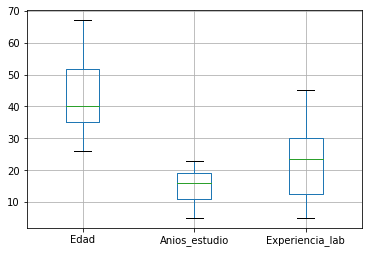

In [ ]:
Empleados.boxplot()
Empleados[['Edad','Anios_estudio','Experiencia_lab']].boxplot()

**Histograma**

El histograma representa la distribución de una variable, mediante las frecuencias absolutas o relativas de las clases de una variable continua categorizada. La representación lo hace mediante áreas de barras rectangulares contiguas en el orden respectivo de las clases.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7bc4bb1780>,
      dtype=object)

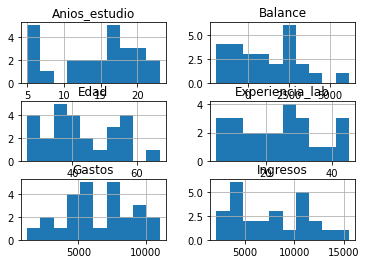

In [ ]:
Empleados.hist()

**Densidad núcleo**

La densidad núcleo es una especie de suavizamiento de un histograma y una estimación de la función de densidad de probabilidad de una variable aleatoria $X$. La estimación se hace mediante una mezcla de densidades. Sean los datos $X_{i}$ para $i=1,2,\ldots ,n$, el estimador de su densidad de probabilidad es
\begin{equation*}
\widehat{f}\left( X\right) =\frac{1}{nh}\sum_{i=1}^{n}K\left( \frac{X-X_{i}}{h}\right)
\end{equation*}
donde $K$ es la función de densidad de probabilidad núcleo o Kernel, y $h$ es un parámetro de suavizado, o ventana. Algunas densidades núcleo son:

Epanechnikov
\begin{equation*}
K\left( z\right) =\left\{\begin{array}{cc}
\frac{3}{4}\left( 1-z^{2}\right) & \left\vert z\right\vert \leq 1 \\ 
0 & \left\vert z\right\vert >1
\end{array}\right.
\end{equation*}
Gaussiana
\begin{equation*}
K\left( z\right) =\frac{1}{\sqrt{2\pi }}e^{-\frac{1}{2}z^{2}}
\end{equation*}
Uniforme
\begin{equation*}
K\left( z\right) =\left\{\begin{array}{cc}
\frac{1}{2} & \left\vert z\right\vert \leq 1 \\ 
0 & \left\vert z\right\vert >1
\end{array}
\right.
\end{equation*}
Se elige la ventana tal que se minimice el error cuadrático integrado medio
\begin{equation*}
MISE=E\left\{ \int_{%TCIMACRO{\U{211d} }
%BeginExpansion
\mathbb{R}
%EndExpansion
}\left[ \widehat{f}\left( x\right) -f\left( x\right) \right] ^{2}dx\right\}
\end{equation*}entonces
\begin{equation*}
\frac{\partial MISE}{\partial h}=0
\end{equation*}
Un estimador plug-in es $\widehat{h}=2.345n^{-0.2}s$ para Epanechnikov y $
\widehat{h}=1.059n^{-0.2}s$ para la Gaussiana.

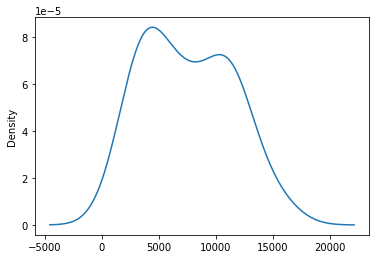

In [ ]:
Empleados.Ingresos.plot.density()

# Apply

In [4]:
# Aplica la media, la mediana, el mínimo y el máximo a las variables del dataframe Empleados
Empleados.apply(['mean','median','min','max'])

,Nombres,Apellidos,Edad,Anios_estudio,Ingresos,Gastos,Fecha_contrato,Experiencia_lab,Balance
min,Alejandro Tito,Barrientos Gómez,26.000000,5.00,2117.000000,1217.000000,2009-01-26 00:00:00,5.000000,-1888.000000
max,Vicente,Zuñiga Fernández,67.000000,23.00,15479.000000,11021.000000,2019-08-10 00:00:00,45.000000,6135.000000
mean,NaN,NaN,42.461538,14.32,7541.576923,6409.807692,2014-05-21 18:00:00,23.166667,1131.769231
median,NaN,NaN,40.000000,16.00,7360.000000,6117.500000,NaT,23.500000,944.500000


In [ ]:
#Función de una sola línea que calcula la medida de entropía de Shannon
lambda x: -np.sum(x/np.sum(x)*np.log(x/np.sum(x)))

In [6]:
#Calcula la medida de entropía de las variables Edad, Ingresos y Gastos
Empleados[['Edad','Ingresos','Gastos']].apply(lambda x:-np.sum(x/np.sum(x)*np.log(x/np.sum(x))))

Edad        3.227628
Ingresos    3.127931
Gastos      3.180385
dtype: float64

# Estadísticos por fila

In [ ]:
#Calcula las medias por fila, es decir, de cada observación (empleado)
Empleados.mean(axis=1)

In [8]:
#Media de ingresos y gastos para cada empleado
Empleados[['Ingresos', 'Gastos']].mean(axis=1)

0      3308.5
1         NaN
2      4121.5
4     12411.5
6      6283.5
7     10250.5
9      4658.0
10     1667.0
11     7346.0
12     2954.0
13    10734.0
14     5878.0
15    10617.5
16     4730.0
17     7303.5
18     7114.0
19     4343.0
20     9407.0
21     5634.0
22     9694.0
23    10124.0
24     2936.5
25     9420.0
26    12256.0
27     5722.5
28     7869.5
29     4584.0
dtype: float64

In [9]:
#Aplica una función a cada empleado
Empleados[['Edad','Ingresos','Gastos']].apply(lambda x: np.prod(np.exp(1/x)), axis=1)

0     1.019670
1     1.000000
2     1.026471
4     1.018523
6     1.034238
7     1.030972
9     1.039663
10    1.019336
11    1.024969
12    1.028149
13    1.015230
14    1.027015
15    1.026859
16    1.022420
17    1.025620
18    1.028457
19    1.025796
20    1.017613
21    1.035454
22    1.019634
23    1.029188
24    1.038439
25    1.021726
26    1.019969
27    1.023911
28    1.032008
29    1.018812
dtype: float64

# Estadísticos por grupos

In [10]:
#Calcula las medias de las variables cuantitativas de Empleados agrupando por sexo
Empleados.groupby('Sexo').mean()

,Edad,Anios_estudio,Ingresos,Gastos,Experiencia_lab,Balance
Sexo,,,,,,
Hombre,46.5,12.785714,7263.6875,6208.8125,28.714286,1054.875
Mujer,36.0,16.272727,7986.2000,6731.4000,15.400000,1254.800


In [11]:
#Calcula las medianas de las variables cuantitativas de Empleados agrupando por Estado civil
Empleados.groupby('Estado_civil').median()

,Edad,Anios_estudio,Ingresos,Gastos,Experiencia_lab,Balance
Estado_civil,,,,,,
Soltero(a),27.0,14.5,4135.0,5014.0,10.0,61.0
Casado(a),38.0,14.0,7185.0,6174.0,18.0,378.0
Divorciado(a),52.0,17.0,11467.0,8121.0,30.0,2598.0
Viudo(a),58.0,16.0,10935.0,7879.0,45.0,2702.0
Desconocido,46.5,NaN,2127.0,2494.0,NaN,-367.0


In [18]:
#Calcula las matrices de correlaciones de las variables cuantitativas
#de Empleados agrupando por Estado civil
Empleados.groupby('Estado_civil').corr()

Edad  ...   Balance
Estado_civil                             ...          
Soltero(a)    Edad             1.000000  ...  0.997970
              Anios_estudio    0.783677  ...  0.742528
              Ingresos         0.882271  ...  0.850501
              Gastos           0.213481  ...  0.150831
              Experiencia_lab -0.576557  ... -0.523353
              Balance          0.997970  ...  1.000000
Casado(a)     Edad             1.000000  ... -0.059469
              Anios_estudio   -0.542159  ...  0.678315
              Ingresos        -0.337870  ...  0.733511
              Gastos          -0.436934  ...  0.151864
              Experiencia_lab  0.851116  ... -0.454260
              Balance         -0.059469  ...  1.000000
Divorciado(a) Edad             1.000000  ...  0.417208
              Anios_estudio   -0.108360  ...  0.757196
              Ingresos         0.092862  ...  0.840186
              Gastos          -0.136871  ...  0.590798
              Experiencia_lab  0.515068  ... -0.476964
              Balance          0.417208  ...  1.000000
Viudo(a)      Edad             1.000000  ...  0.645700
              Anios_estudio    0.745528  ...  0.990301
              Ingresos         0.778355  ...  0.981985
              Gastos           0.918228  ...  0.895322
              Experiencia_lab  0.277350  ... -0.554550
              Balance          0.645700  ...  1.000000
Desconocido   Edad             1.000000  ...  1.000000
              Anios_estudio         NaN  ...       NaN
              Ingresos        -1.000000  ... -1.000000
              Gastos          -1.000000  ... -1.000000
              Experiencia_lab       NaN  ...       NaN
              Balance          1.000000  ...  1.000000

[30 rows x 6 columns]

In [ ]:
lista = ['Edad','Anios_estudio','Experiencia_lab','Estado_civil']
Empleados[lista].groupby('Estado_civil').boxplot()

In [21]:
#Calcula la media de gastos por Sexo y Estado civil
pd.crosstab(Empleados.Sexo, Empleados.Estado_civil, values=Empleados.Gastos,
            aggfunc='mean', margins=True, margins_name='Total')

Estado_civil,Soltero(a),Casado(a),Divorciado(a),Viudo(a),Desconocido,Total
Sexo,,,,,,
Hombre,5181.0,5856.833333,7810.25,7596.666667,2494.0,6208.812500
Mujer,3960.0,7324.714286,8121.00,NaN,NaN,6731.400000
Total,4367.0,6647.230769,7872.40,7596.666667,2494.0,6409.807692


# ANOVA y Prueba Chi cuadrado

In [22]:
import scipy.stats as st

**Análisis de varianza (ANOVA)**

El método ANOVA a una vía (o un factor) es una prueba estadística para comparar las medias de $k$ muestras provenientes de $k$ respectivas poblaciones. La hipótesis de prueba (nula) es que las medias de las $k$ poblaciones son iguales, es decir, $H_{0}:\mu _{1}=\mu _{2}=\ldots =\mu _{k}$ contra la hipótesis alternativa de que al menos una es diferente, o sea, $H_{1}:\exists \left( \mu _{i}\neq \mu _{j}\right)$ para $ i\neq j$. La cantidad de observaciones (tamaño del grupo) en cada nivel del factor es $n_{i}$ con $i=1,2,\ldots ,k$. Las medias de cada grupo son:
\begin{eqnarray*}
\overline{X}_{i}=\frac{\sum_{j=1}^{n_{i}}X_{ij}}{n_{i}}\qquad i=1,2,\ldots,k
\end{eqnarray*}
La media de medias es $\overline{X}=\frac{\sum_{i=1}^{k}\overline{X}_{i}n_{i}}{n} $ y el total de observaciones es $n=\sum_{i=1}^{k}n_{i}$. Las sumas de cuadrados son:
\begin{eqnarray*}
SCT &=&SCG+SCD \\
\sum_{i=1}^{k}\sum_{j=1}^{n_{i}}\left( X_{ij}-\overline{X}\right) ^{2}
&=&\sum_{i=1}^{k}\left( \overline{X}_{i}-\overline{X}\right)
^{2}n_{i}+\sum_{i=1}^{k}\sum_{j=1}^{n_{i}}\left( X_{ij}-\overline{X}%
_{i}\right) ^{2}
\end{eqnarray*}
Si la $H_{0}$ es verdadera, y se cumplen los supuestos de iguales varianzas, asimismo, las poblaciones son independientes, y sus distribuciones son normales, entonces el cociente
\begin{eqnarray*}
F=\frac{\frac{SCG}{k-1}}{\frac{SCD}{n-k}}=\frac{MCG}{MCD}
\end{eqnarray*}
sigue una distribución $F$ con $k-1$ grados de libertad para el numerador $MCG$, y $n-k$ grados de libertad para el denominador $MCD$, donde la media de cuadrados entre los grupos es $MCG=\frac{SCG}{k-1}$ y la media de cuadrados dentro de los grupos es $MCD=\frac{SCD}{n-k}$.

La distribución $F$ está definida para el dominio $\boldsymbol{F}>0$, y es asimétrica con sesgo a la derecha, entonces si el estadístico $F$ toma valores muy altos, la $H_{0}$ podría no ser verdadera. Para tomar una decisión, se establece una regla, que consiste en que se rechace la $H_{0}$ si el estadístico $F$ calculado es mayor al cuantil $1-\alpha $ que se escribirá como $F_{\alpha }$, denominado también como valor crítico. Otra forma de realizar la prueba es calculando la probabilidad $\Pr \left( 
\boldsymbol{F}>F\right) $, es decir, la probabilidad de que la variable aleatoria $\boldsymbol{F}$ sea mayor al valor calculado $F$, tal probabilidad se conoce como p-valor o p-value. Por tanto si se cumple que $\Pr \left( \boldsymbol{F}>F\right) <\alpha $
para un $\alpha $ pequeño, entonces se rechaza la $H_{0}$ dado que es muy baja la probabilidad de que los posibles valores $\boldsymbol{F}$ sean mayores a $F$, lo que quiere decir que la distribución $F$ bajo $H_{0}$ no debe ser la verdadera. Por supuesto la $H_{0}$ no se rechaza si $\Pr \left( \boldsymbol{F}>F\right) \geq \alpha $.

In [26]:
# Se prueba la hipótesis de que la media de ingresos de los casados es igual a la
# media de ingresos de los divorciados y de los viudos
anova=st.f_oneway(Empleados.Ingresos[Empleados.Estado_civil=='Casado(a)'],
                  Empleados.Ingresos[Empleados.Estado_civil=='Divorciado(a)'],
                  Empleados.Ingresos[Empleados.Estado_civil=='Viudo(a)'],)
anova[1] #acceder al p-valor
# No se rechaza la hipótesis de igualdad

0.16660925838363422

**Prueba Chi cuadrado**

La prueba chi cuadrado para tablas de doble entrada (tablas de contingencia) docima la hipótesis que las dos variables categóricas son independientes. La hipótesis de nula es que la frecuencia conjunta de cada par de categorías es igual al producto de las frecuencias marginales respectivas, es decir, $H_{0}:\pi_{ij}=\pi_{i.}\pi_{.j}$ contra la hipótesis alternativa de que son diferentes, o sea, $H_{1}:\pi_{ij}\neq \pi_{i.}\pi_{.j}$. Entonces el estadístico de prueba es:
\begin{eqnarray*}
\chi ^{2} &=&\sum_{j=1}^{h}\sum_{i=1}^{k}\frac{\left( n_{ij}-e_{ij}\right)^{2}}{e_{ij}}
\end{eqnarray*}
donde $n_{ij}$ es la frecuencia conjunta observada y $e_{ij}$ es la frecuencia esperada que se calcula como
\begin{eqnarray*}
e_{ij} &=&\frac{n_{i.}n_{.j}}{n}
\end{eqnarray*}
El estadístico $\chi^{2}$ sigue asintóticamente una distribución chi cuadrado con $\left( k-1\right)\left( h-1\right)$ grados de libertad. Si $\chi^{2}$ toma valores altos, entonces se rechaza la hipótesis nula. Para una decisión basada en un umbral se puede utilizar el p-valor de la prueba que generalmente se fija en 0.05. Por tanto si el p-valor es menor a 0.05 entonces se rechaza la hipótesis de que las variables son independientes, caso contrario no se rechaza la independencia.

In [27]:
ji2=st.chi2_contingency(pd.crosstab(Empleados.Estado_civil,
                                    Empleados.Satisfaccion_trabajo))
ji2[1] #accede al p-valor del estadístico chi2

0.016498126998304875

# Regresión lineal simple

In [ ]:
from statsmodels.formula.api import ols
modelo1=ols('Gastos~Ingresos',data=Empleados).fit()
modelo1.rsquared
modelo1.mse_resid
modelo1.summary()
modelo1.predict(Empleados.Ingresos)
modelo1.predict({'Ingresos':np.arange(100,500,50)})